In [30]:
from load_log import *
from pitch_model import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [11]:
df1 = log2df('Xianyue1.log')
df2 = log2df('Xianyue2.log')
df3 = log2df('Xianyue3.log')

In [13]:
# models for 3 data
m1 = pitch_model(df1)
m1.pre_pitch(0.04)
m1.fit(300)

m2 = pitch_model(df2)
m2.pre_pitch(0.04)
m2.fit(300)

m3 = pitch_model(df3)
m3.pre_pitch(0.04)
m3.fit(300)

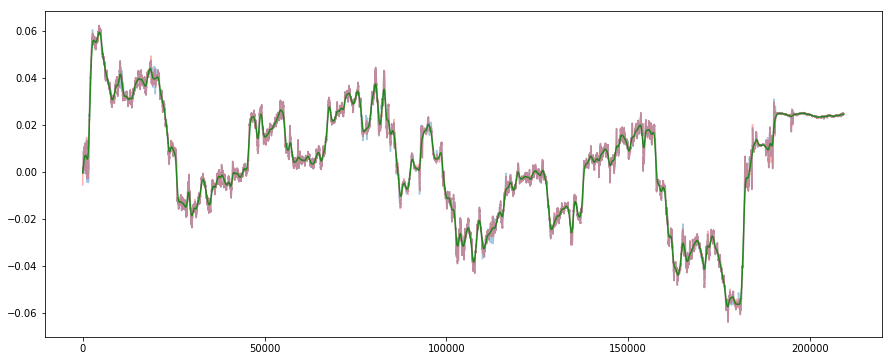

In [84]:
# general performance for Xianyue1 data
plt.figure(figsize=(15,6))
plt.plot(m1.pitch,alpha=0.4, label='original pitch')
plt.plot(m1.pitch_reducedbias, c='r', alpha=0.3, label='pitch after reducing bias')
plt.plot(m1.pitch_smooth, alpha=0.8, c='g', label='smoothed pitch');

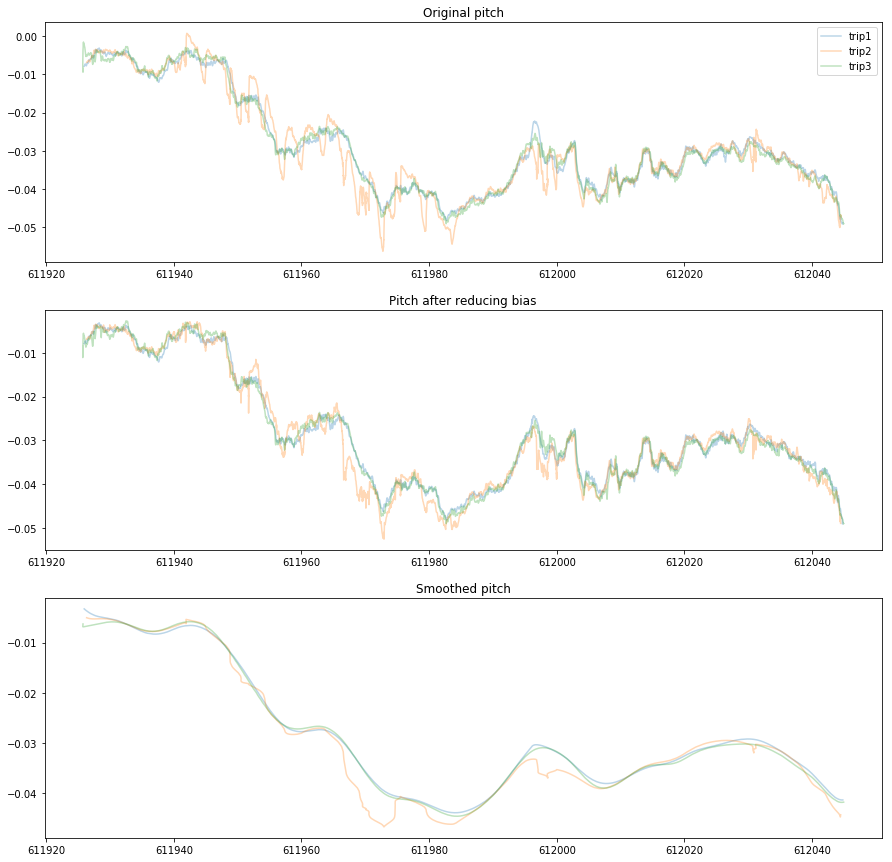

In [99]:
loc1 = np.array(list(range(158000, 171000)))
loc2 = np.array(list(range(180000, 204000)))
loc3 = np.array(list(range(157000, 170000)))
# biased reduce performancce
plt.figure(figsize=(15,15))
plt.subplot(311)
plt.title('Original pitch')
plt.plot(m1.x[loc1], m1.pitch[loc1], alpha=0.3, label='trip1')
plt.plot(m2.x[loc2], m2.pitch[loc2], alpha=0.3, label='trip2')
plt.plot(m3.x[loc3], m3.pitch[loc3], alpha=0.3, label='trip3')
plt.legend()
plt.subplot(312)
plt.title('Pitch after reducing bias')
plt.plot(m1.x[loc1], m1.pitch_reducedbias[loc1], alpha=0.3, label='trip1')
plt.plot(m2.x[loc2], m2.pitch_reducedbias[loc2], alpha=0.3, label='trip2')
plt.plot(m3.x[loc3], m3.pitch_reducedbias[loc3], alpha=0.3, label='trip3')
plt.subplot(313)
plt.title('Smoothed pitch')
plt.plot(m1.x[loc1], m1.pitch_smooth[loc1], alpha=0.3, label='trip1')
plt.plot(m2.x[loc2], m2.pitch_smooth[loc2], alpha=0.3, label='trip2')
plt.plot(m3.x[loc3], m3.pitch_smooth[loc3], alpha=0.3, label='trip3');
plt.savefig('r.png')

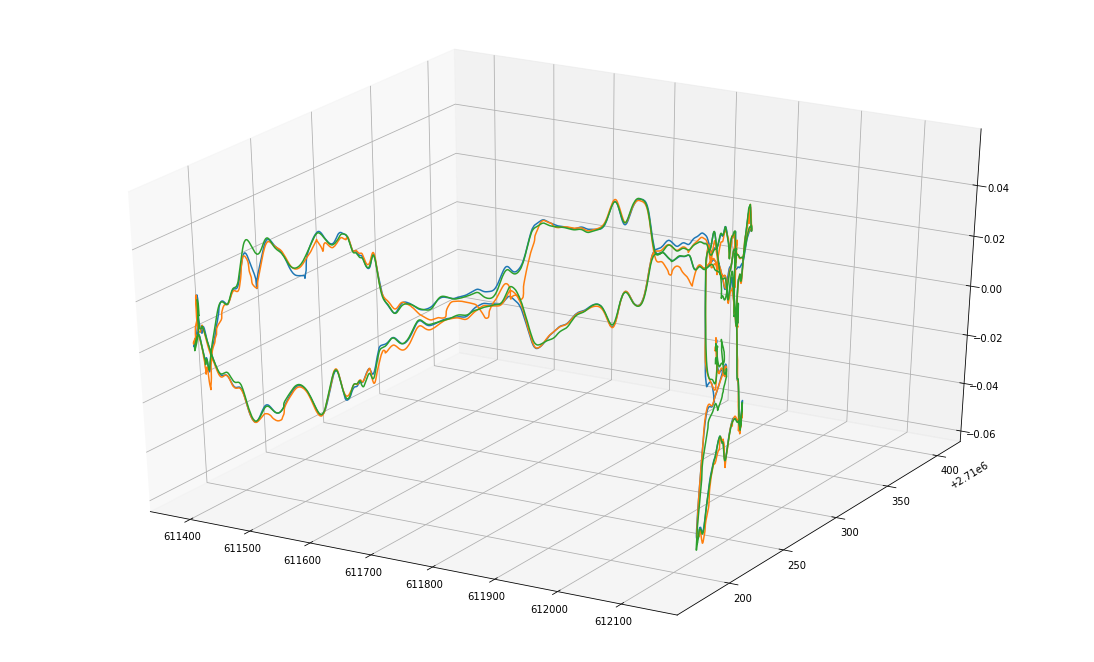

In [83]:
# smoothed pitches for 3 datasets visualization
fig=plt.figure(figsize=(15,9))
ax = Axes3D(fig)
ax.plot(m1.x, m1.y, m1.pitch_smooth)
ax.plot(m2.x, m2.y, m2.pitch_smooth)
ax.plot(m3.x, m3.y, m3.pitch_smooth);

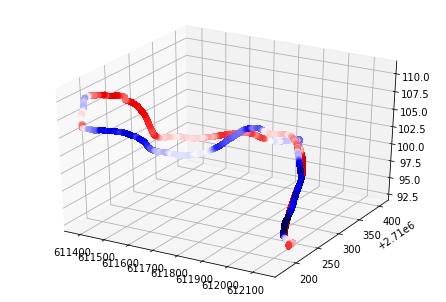

In [95]:
# visualization: smoothed pitches for datasets 1
fig=plt.figure()
ax = Axes3D(fig)
ax.scatter(m1.x, m1.y, MA(m1.z,5001), c=m1.pitch_smooth, cmap='seismic');

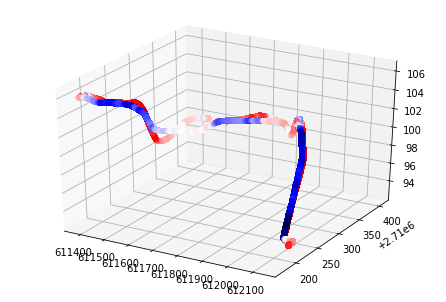

In [96]:
# visualization: smoothed pitches for datasets 2
fig=plt.figure()
ax = Axes3D(fig)
ax.scatter(m2.x, m2.y, MA(m2.z,5001), c=m2.pitch_smooth, cmap='seismic');

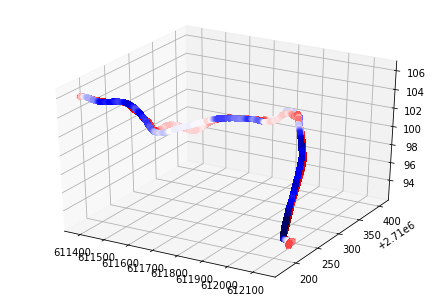

In [97]:
# visualization: smoothed pitches for datasets 3
fig=plt.figure()
ax = Axes3D(fig)
ax.scatter(m3.x, m3.y, MA(m3.z,5001), c=m3.pitch_smooth, cmap='seismic');